<h1 style = "text-align: left">[W7] [DS4A]  Nexans - Basic Exploratory Data Analysis (EDA) </h1>

<h2 style = "text-align: left">Nexans Colombia | Team # 22</h2>

<h4 style = "text-align: left">Andres Fabian Osorio, Aron Forero, Camilo Castellanos, Guillermo Castillo, Jairo Bautista, Jorge Florez, Nicolás López </h4>

<h2 style = "text-align: left">Case Introduction</h2>

<p> 

**Business Context.**  Nexans Colombia is an electrical wiring and telecommunications world-class manufacturer. Nexans Colombia has been growing significantly over the last 13 years. They have contacted DS4A students to help them understand the variation in demand of electrical wiring on the market so that they can foresee the supply chain better. Nexans is interested in learning how external factors such as the metal stock market, currency and building GDP affect their sales.
</p>
<br>
<p>

**Business Problem.** The company would like DS4A data scientists to answer the following questions: **“What’s the product families’ demand variation on a fixed period (monthly, quarterly, yearly) for the market segments?”**, **“Is there any client clusterization based on customer behaviour different than the current customer segments on the company?”** and **“Are there any external factors that can influentiate the electrical wiring demand?**
</p>
<br>
<p> 

**Analytical Context.** Thus the scenario above can be common amongst manufacturing businesses, aligning offer and demand might be a very complex problem to solve, as it would represent a business crystal ball. As a first approach, DS4A data scientists begin a preliminary Exploratory Data Analysis (EDA) on Nexans Colombia historical sales by opening the CSV file on Jupyter Notebook, followed by initial column descriptions and name cleaning. Later on, we proceed by checking null values and a relevant variables analysis. Finally we graph sales per year to give a full picture of the current dataset.
</p>


<h2>Market Trend Forecast </h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>What are the datasets that participants will consider to use to solve this problem?</h2>

<p><strong>Dataset that participants can access to solve the problem.</strong> 
Historical sales of the company and a forecast already built in the company.</p>


<h1 style="color: #5e9ca0;"><span style="color: #2b2301;">Variable definition</span></h1>
<p>&nbsp;</p>
<ol>
<li>Entrega: Is the id of delivery.</li>
<li>Documento de ventas: Is the id of sale&acute;s document</li>
<li>Factura: The identifier of bill</li>
<li>Nombre Destinatario Mc&iacute;as: The name of person or business name that receives the product</li>
<li>Destinatario mc&iacute;a: Nit of person or business name that receives the product</li>
<li>Fecha Reparto: Date of delivery</li>
<li>Fecha Transporte: Pending</li>
<li>Fecha factura: Date of bill</li>
<li>Factura_1: Other number of factura.</li>
<li>Material: Id of material</li>
<li>Texto breve de material: Short text of material</li>
<li>Cantidad entrega: Quantity of product delivery</li>
<li>Un.medida venta: Unit of measire of product</li>
<li>Peso bruto: Gross weight of the delivered product including the tara (packing of product)</li>
<li>Peso Bruto: Other gross weight of the delivered product</li>
<li>Peso Tara: Gross weight of the tara (Packing of product|)</li>
<li>Peso Neto: Gross weight of the delivered product without the tara (packing of product)</li>
<li>MC Al Kg: Amount of aluminium on product</li>
<li>MC Cu Kg: Amount of cooper on product</li>
<li>Moneda del documento: currency of the document (bill)</li>
<li>Unidad-salida: Unit of measure of deparrture</li>
<li>Valor Neto (USD): Values of sale before TAX</li>
<li>Fecha de Pedido: Date of the order</li>
<li>Fecha Entrega: Date of delivery</li>
<li>Stock a Pedidos:Order type</li>
<li>Precio Cliente: Customer price product</li>
<li>Precio Neto:Pending</li>
<li>Vendedor: name of the selling agent</li>
<li>Grupo Clientes: Group of clients of the company.</li>
<li>C&oacute;digo EAN/UPC: Barcode of the product</li>
<li>Calle y n&uacute;mero: Adress of the customer</li>
<li>Distrito: Distructo of the customer</li>
<li>Poblaci&oacute;n: City of the customer</li>
<li>Pais: Country of the customer</li>
<li>Valor Moneda Local: Value in COP</li>
<li>Moneda: Currency of the bill</li>
</ol>

In [ ]:
#Load dataset
C=pd.ExcelFile('/content/drive/My Drive/DS4A/DS4A_Nexans_Colombia_Final Project_2020_2/[W7] In-depth EDA/Nexan_Pre/Customer_Score_2020_v2.xlsx')

In [ ]:
print(C.sheet_names)

['Score Michel']


In [ ]:
Customer=C.parse('Score Michel')
print(Customer.shape)
Customer.head()

(999, 10)


,NIT,Customer Name,Customer Score,Financial Score,SEGMENT,ZONA,GROUP_CUSTOMER,TATIANA,SEGMENT2,TRUE / FALSE
0,900122962.0,2KINSE SAS,B,B,INDUSTRY,INDUSTRIA,2KINSE SAS,B,INDUSTRY,True
1,900065878.0,A M ELECTRICISTA SA,B,B,INSTALADOR,CENTRO,A M ELECTRICISTA SA**,B,INSTALADOR,True
2,890213074.0,A M V S A,Z,Z,INSTALADOR,SANTANDER,A M V S A,Z,INSTALADOR,True
3,860003563.0,ABB POWER GRIDS COLOMBIA LTDA,Z,Z,INDUSTRY,INDUSTRIA,ABB LTDA,Z,INDUSTRY,True
4,830040872.0,ACTIVIDADES DE INSTALACIONES Y SERV,Z,Z,D&I,COSTA,ACTIVIDADES DE INSTALACIONES Y SERV,C,D&I,False


In [ ]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NIT              365 non-null    float64
 1   Customer Name    395 non-null    object 
 2   Customer Score   395 non-null    object 
 3   Financial Score  395 non-null    object 
 4   SEGMENT          388 non-null    object 
 5   ZONA             388 non-null    object 
 6   GROUP_CUSTOMER   395 non-null    object 
 7   TATIANA          393 non-null    object 
 8   SEGMENT2         388 non-null    object 
 9   TRUE / FALSE     999 non-null    bool   
dtypes: bool(1), float64(1), object(8)
memory usage: 71.3+ KB


In [ ]:
R=pd.ExcelFile('/content/drive/My Drive/DS4A/DS4A_Nexans_Colombia_Final Project_2020_2/[W7] In-depth EDA/Nexan_Pre/Lista_Ref.xlsx')

In [ ]:
print(R.sheet_names)

['Hoja1']


In [ ]:
Ref=R.parse('Hoja1')
Ref.head()

,Material,Texto breve material,Stock/A Pedido,G.Material2,Descrip2,G.Material3,Descrip3,UNIDAD DE EMPAQUE,R/C,MERCADO,kg/km Al,kg/km Cu,kg/km Neto,Metal,CLASIFICACIÓN ABC,Tipo de Stock,Lead Time (dias),S. CALIBRE,S. FAMILIA,Antes de color,Antes de fraccionado,S. EMPAQUE,Clasificación Metal
0,10011036,2X10 AWG DUPLEX PVC 300V 60C BL R100,STOCK,423,Nexans CO Duplex,149,Dúplex-18 a 10 Rollos,100,R,BUILDING,0.0,90.4,122.4,CU,B,COMERCIO,15.0,2x10+0,DUPLEX,Duplex 2x10,Duplex 2x10 BL,R100,FG CU
1,10011037,2X10 AWG DUPLEX PVC 300V 60C NE R100,A PEDIDO,423,Nexans CO Duplex,149,Dúplex-18 a 10 Rollos,100,R,BUILDING,0.0,89.3,121.0,CU,OUT,MTO,45.0,2x10+0,DUPLEX,Duplex 2x10,Duplex 2x10 NE,R100,FG CU
2,10011038,2X12 AWG DUPLEX PVC 300V 60C BL R100,STOCK,423,Nexans CO Duplex,149,Dúplex-18 a 10 Rollos,100,R,BUILDING,0.0,57.4,78.2,CU,A,COMERCIO,15.0,2x12+0,DUPLEX,Duplex 2x12,Duplex 2x12 BL,R100,FG CU
3,10011039,2X12 AWG DUPLEX PVC 300V 60C NE R100,A PEDIDO,423,Nexans CO Duplex,149,Dúplex-18 a 10 Rollos,100,R,BUILDING,0.0,56.7,77.2,CU,OUT,MTO,45.0,2x12+0,DUPLEX,Duplex 2x12,Duplex 2x12 NE,R100,FG CU
4,10011041,2X14 AWG DUPLEX PVC 300V 60C BL R100,STOCK,423,Nexans CO Duplex,149,Dúplex-18 a 10 Rollos,100,R,BUILDING,0.0,35.9,52.9,CU,A,COMERCIO,15.0,2x14+0,DUPLEX,Duplex 2x14,Duplex 2x14 BL,R100,FG CU


In [ ]:
S=pd.ExcelFile('/content/drive/My Drive/DS4A/DS4A_Nexans_Colombia_Final Project_2020_2/[W7] In-depth EDA/Nexan_Pre/Sales.xlsx')

In [ ]:
print(S.sheet_names)

['ZSD003']


In [ ]:
Sales=S.parse('ZSD003')


In [ ]:
rename_columns = {
  'Documento de ventas':'Doc_Ventas', 
  'Nombre Destinatario Mcías':'Nombre_Destinatario_Mcias', 
  'Destinatario mcía.':'NIT', 
  'Fecha Reparto':'Fecha_Reparto',
  'Fecha factura':'Fecha_factura', 
  'Texto breve de material':'Texto_breve_de_material',
  'MC Al Kg':'MC_Al_Kg', 
  'MC Cu Kg':'MC_Cu_Kg',
  'Fecha de Pedido':'Fecha_de_Pedido', 
  'Fecha Entrega':'Fecha_Entrega',
  'Stock a Pedidos':'Stock_Pedidos', 
  'Precio Cliente': 'Precio_Cliente',
  'Precio Neto':'Precio_Neto',
  'Grupo Clientes':'Grupo_Clientes',
  'Población':'Poblacion', 
  'Valor Moneda Local': 'Valor_Moneda_Local',
}
Sales.rename(columns=rename_columns, inplace=True)

## Null Values Analysis of the Full Dataset

This is necessary to know the data that we are going to use in our analysis.  
The next cell shows how many percentages units are Null/missing values in each of the columns of our dataset.

In [ ]:
print('Null Percentage of each variable: \n')
null_percentage = (Sales.isnull().sum()/Sales.shape[0])*100
null_percentage[null_percentage != 0]

Null Percentage of each variable: 



Doc_Ventas          0.009581
Factura            20.946060
Factura.1          20.946060
Fecha_de_Pedido    14.828063
Fecha_Entrega       0.026189
Grupo_Clientes     19.309250
Distrito           58.056460
Poblacion           1.940219
dtype: float64

In [ ]:
Sales.columns

Index(['Entrega', 'Doc_Ventas', 'Factura', 'Nombre_Destinatario_Mcias', 'NIT',
       'Fecha_Reparto', 'Fecha_factura', 'Factura.1', 'Material',
       'Texto_breve_de_material', 'MC_Al_Kg', 'MC_Cu_Kg', 'Fecha_de_Pedido',
       'Fecha_Entrega', 'Stock_Pedidos', 'Precio_Cliente', 'Precio_Neto',
       'Grupo_Clientes', 'Distrito', 'Poblacion', 'Pais',
       'Valor_Moneda_Local'],
      dtype='object')

**Effective sales dataset**

We are going to create a new dataset only with the efective orders. To create the new dataset we filter out by the "Factura" column, taking only values that are not null or "0" and "Valor Moneda Local" column value is not "0".

*The effective sales represent aprox. 73% of the total orders reported*

In [ ]:
Sales = Sales[(Sales["Factura"].notnull()) & (Sales["Factura"] != "0") & (Sales["Valor_Moneda_Local"] != 0)]

In [ ]:
remove_dest = { "Bodega Comercial CEDSA" , "Planta de Cables CEDSA" , "Almacenes Externos"}
Sales = Sales[~Sales.Nombre_Destinatario_Mcias.isin(remove_dest)]

In [ ]:
Sales["Fecha_factura"] = pd.to_datetime(Sales["Fecha_factura"], format="%d/%m/%Y")
Sales.insert(0, 'YEAR', pd.DatetimeIndex(Sales["Fecha_factura"]).year)
Sales.insert(1, 'MONTH', pd.DatetimeIndex(Sales['Fecha_factura']).month)
Sales.insert(2, 'DAY', pd.DatetimeIndex(Sales['Fecha_factura']).day)
Sales.insert(3, 'WEEK', Sales['Fecha_factura'].dt.weekday)

In [ ]:
drop_indexS=Sales[(Sales['YEAR']==2020) & (Sales['MONTH'].isin([10,11,12]))].index 
Sales.drop(drop_indexS, inplace = True)

In [ ]:
Sales.head()

,YEAR,MONTH,DAY,WEEK,Entrega,Doc_Ventas,Factura,Nombre_Destinatario_Mcias,NIT,Fecha_Reparto,Fecha_factura,Factura.1,Material,Texto_breve_de_material,MC_Al_Kg,MC_Cu_Kg,Fecha_de_Pedido,Fecha_Entrega,Stock_Pedidos,Precio_Cliente,Precio_Neto,Grupo_Clientes,Distrito,Poblacion,Pais,Valor_Moneda_Local
0,2016,2,3,2,80881927,361080.0,F00300115536,ELECTRIFICADORA DEL CARIBE S A,802007670,2015-11-26,2016-02-03,90651180.0,10021179,4X12AWG CONTROL PVC/PVC TC Pa 600V90ºC,0.0,62.92,2015-09-17 00:00:00,2015-11-26,A PEDIDO,121680.0,40.56,Industrie,BARRANQUILLA,BARRANQUILLA,Colombia,2088840
1,2016,2,3,2,80881927,361080.0,F00300115536,ELECTRIFICADORA DEL CARIBE S A,802007670,2015-11-26,2016-02-03,90651180.0,10021179,4X12AWG CONTROL PVC/PVC TC Pa 600V90ºC,0.0,62.92,2015-09-17 00:00:00,2015-11-26,A PEDIDO,121680.0,40.56,Industrie,BARRANQUILLA,BARRANQUILLA,Colombia,2088840
2,2016,2,3,2,80881928,361697.0,F00300115537,ELECTRIFICADORA DEL CARIBE S A,802007670,2015-11-26,2016-02-03,90651181.0,10021180,6X12AWG CONTROL PVC/PVC TC Pa 600V90ºC,0.0,94.19,2015-09-23 00:00:00,2015-11-26,A PEDIDO,119040.0,59.52,Industrie,BARRANQUILLA,BARRANQUILLA,Colombia,3059328
3,2016,2,3,2,80881928,361697.0,F00300115537,ELECTRIFICADORA DEL CARIBE S A,802007670,2015-11-26,2016-02-03,90651181.0,10021180,6X12AWG CONTROL PVC/PVC TC Pa 600V90ºC,0.0,91.44,2015-09-23 00:00:00,2015-11-26,A PEDIDO,119040.0,59.52,Industrie,BARRANQUILLA,BARRANQUILLA,Colombia,2970048
4,2016,2,3,2,80881929,363797.0,F00300115538,ELECTRIFICADORA DEL CARIBE S A,802007670,2015-11-26,2016-02-03,90651182.0,10021179,4X12AWG CONTROL PVC/PVC TC Pa 600V90ºC,0.0,61.09,2015-10-13 00:00:00,2015-11-26,A PEDIDO,81120.0,40.56,Industrie,BARRANQUILLA,BARRANQUILLA,Colombia,2028000


In [ ]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226986 entries, 0 to 312952
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   YEAR                       226986 non-null  int64         
 1   MONTH                      226986 non-null  int64         
 2   DAY                        226986 non-null  int64         
 3   WEEK                       226986 non-null  int64         
 4   Entrega                    226986 non-null  int64         
 5   Doc_Ventas                 226986 non-null  float64       
 6   Factura                    226986 non-null  object        
 7   Nombre_Destinatario_Mcias  226986 non-null  object        
 8   NIT                        226986 non-null  object        
 9   Fecha_Reparto              226986 non-null  datetime64[ns]
 10  Fecha_factura              226986 non-null  datetime64[ns]
 11  Factura.1                  226986 non-null  float64 

In [ ]:
Sales["NIT"] = Sales["NIT"].astype(int)

In [ ]:
Sales.head(3)

,YEAR,MONTH,DAY,WEEK,Entrega,Doc_Ventas,Factura,Nombre_Destinatario_Mcias,NIT,Fecha_Reparto,Fecha_factura,Factura.1,Material,Texto_breve_de_material,MC_Al_Kg,MC_Cu_Kg,Fecha_de_Pedido,Fecha_Entrega,Stock_Pedidos,Precio_Cliente,Precio_Neto,Grupo_Clientes,Distrito,Poblacion,Pais,Valor_Moneda_Local
0,2016,2,3,2,80881927,361080.0,F00300115536,ELECTRIFICADORA DEL CARIBE S A,802007670,2015-11-26,2016-02-03,90651180.0,10021179,4X12AWG CONTROL PVC/PVC TC Pa 600V90ºC,0.0,62.92,2015-09-17 00:00:00,2015-11-26,A PEDIDO,121680.0,40.56,Industrie,BARRANQUILLA,BARRANQUILLA,Colombia,2088840
1,2016,2,3,2,80881927,361080.0,F00300115536,ELECTRIFICADORA DEL CARIBE S A,802007670,2015-11-26,2016-02-03,90651180.0,10021179,4X12AWG CONTROL PVC/PVC TC Pa 600V90ºC,0.0,62.92,2015-09-17 00:00:00,2015-11-26,A PEDIDO,121680.0,40.56,Industrie,BARRANQUILLA,BARRANQUILLA,Colombia,2088840
2,2016,2,3,2,80881928,361697.0,F00300115537,ELECTRIFICADORA DEL CARIBE S A,802007670,2015-11-26,2016-02-03,90651181.0,10021180,6X12AWG CONTROL PVC/PVC TC Pa 600V90ºC,0.0,94.19,2015-09-23 00:00:00,2015-11-26,A PEDIDO,119040.0,59.52,Industrie,BARRANQUILLA,BARRANQUILLA,Colombia,3059328


**TRM value insert**

In [ ]:
df_TRM = pd.read_csv("drive/My Drive/DS4A/data/TRM2015_2020.csv")
df_TRM["Fecha (dd/mm/aaaa)"] = pd.to_datetime(df_TRM["Fecha (dd/mm/aaaa)"])
df_TRM.head()

,Año,Fecha (dd/mm/aaaa),TRM,Día del mes,Mes,Id Mes
0,2020,2020-10-10,"3824,25",10,Octubre,10
1,2020,2020-10-09,"3839,73",9,Octubre,10
2,2020,2020-10-08,"3837,79",8,Octubre,10
3,2020,2020-10-07,"3826,77",7,Octubre,10
4,2020,2020-10-06,"3843,75",6,Octubre,10


In [ ]:
import datetime

In [ ]:
df_TRM['Año'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015])

In [ ]:
# Se dejan los años de interes
Sales = Sales[Sales['YEAR'].isin([2018, 2019, 2020])]
df_TRM = df_TRM[df_TRM['Año'].isin([2018, 2019, 2020])]

In [ ]:
today = datetime.date(2020, 10, 10)
TRM_column = []
for datedf in Sales["Fecha_factura"]:
    if datedf > today:
        TRM_column.append("3824,25")
    else:
        trm_arr = df_TRM[df_TRM['Fecha (dd/mm/aaaa)'] == datedf]['TRM'].values
        if trm_arr:
          TRM_column.append(trm_arr[0])
        else:
          TRM_column.append("3824,25")
        # for datetrm, trm in zip(df_TRM["Fecha (dd/mm/aaaa)"], df_TRM["TRM"]):
        #     if datedf == datetrm:
        #         TRM_column.append(trm)
        #         break
        #     else:
        #         pass

In [ ]:
Sales["TRM_Dollar"] = TRM_column

In [ ]:
Sales.head(3)

,YEAR,MONTH,DAY,WEEK,Entrega,Doc_Ventas,Factura,Nombre_Destinatario_Mcias,NIT,Fecha_Reparto,Fecha_factura,Factura.1,Material,Texto_breve_de_material,MC_Al_Kg,MC_Cu_Kg,Fecha_de_Pedido,Fecha_Entrega,Stock_Pedidos,Precio_Cliente,Precio_Neto,Grupo_Clientes,Distrito,Poblacion,Pais,Valor_Moneda_Local,TRM_Dollar
58433,2018,1,2,1,81059579,430205.0,COL00001914,DEMCA SAS,900262908,2017-12-14,2018-01-02,90767571.0,10035825,3x12AWG MULTIFLEX PVC/NY 600V 90C TC,0.0,280.86,2017-11-22 00:00:00,2017-12-14,STOCK,116739.0,35.70,Empresas contratista,0,CARTAGENA,Colombia,11673900,2984
58434,2018,1,2,1,81059579,430205.0,COL00001914,DEMCA SAS,900262908,2017-12-27,2018-01-02,90767571.0,10013588,2/0AWG (B) THHN/THWN-2 TC 600V 90ºC VE,0.0,237.59,2017-11-22 00:00:00,2017-12-14,A PEDIDO,65200.0,163.00,Empresas contratista,0,CARTAGENA,Colombia,6520000,2984
58793,2018,1,2,1,81060355,432110.0,COL00001909,CASTRO ZUÑIGA JOSE HILDEBRANDO,10539393,2017-12-21,2018-01-02,90767565.0,10035828,3x10AWG MULTIFLEX PVC/NY 600V 90C TC,0.0,27.05,2017-12-19 00:00:00,2017-12-19,STOCK,10082.0,50.41,Distrib. y retail,POPAYAN,POPAYAN,Colombia,1008200,2984


**Merge the different data sets with relevant information**

In [ ]:
dfSales=pd.merge(Sales, Customer, how="left", left_on="NIT", right_on="NIT")

In [ ]:
dfSales.head(2)

,YEAR,MONTH,DAY,WEEK,Entrega,Doc_Ventas,Factura,Nombre_Destinatario_Mcias,NIT,Fecha_Reparto,Fecha_factura,Factura.1,Material,Texto_breve_de_material,MC_Al_Kg,MC_Cu_Kg,Fecha_de_Pedido,Fecha_Entrega,Stock_Pedidos,Precio_Cliente,Precio_Neto,Grupo_Clientes,Distrito,Poblacion,Pais,Valor_Moneda_Local,TRM_Dollar,Customer Name,Customer Score,Financial Score,SEGMENT,ZONA,GROUP_CUSTOMER,TATIANA,SEGMENT2,TRUE / FALSE
0,2018,1,2,1,81059579,430205.0,COL00001914,DEMCA SAS,900262908,2017-12-14,2018-01-02,90767571.0,10035825,3x12AWG MULTIFLEX PVC/NY 600V 90C TC,0.0,280.86,2017-11-22 00:00:00,2017-12-14,STOCK,116739.0,35.7,Empresas contratista,0,CARTAGENA,Colombia,11673900,2984,DEMCA SAS,C,C,INDUSTRY,INDUSTRIA,DEMCA SAS,C,INDUSTRY,True
1,2018,1,2,1,81059579,430205.0,COL00001914,DEMCA SAS,900262908,2017-12-27,2018-01-02,90767571.0,10013588,2/0AWG (B) THHN/THWN-2 TC 600V 90ºC VE,0.0,237.59,2017-11-22 00:00:00,2017-12-14,A PEDIDO,65200.0,163.0,Empresas contratista,0,CARTAGENA,Colombia,6520000,2984,DEMCA SAS,C,C,INDUSTRY,INDUSTRIA,DEMCA SAS,C,INDUSTRY,True


In [ ]:
dfSales.columns

Index(['YEAR', 'MONTH', 'DAY', 'WEEK', 'Entrega', 'Doc_Ventas', 'Factura',
       'Nombre_Destinatario_Mcias', 'NIT', 'Fecha_Reparto', 'Fecha_factura',
       'Factura.1', 'Material', 'Texto_breve_de_material', 'MC_Al_Kg',
       'MC_Cu_Kg', 'Fecha_de_Pedido', 'Fecha_Entrega', 'Stock_Pedidos',
       'Precio_Cliente', 'Precio_Neto', 'Grupo_Clientes', 'Distrito',
       'Poblacion', 'Pais', 'Valor_Moneda_Local', 'TRM_Dollar',
       'Customer Name', 'Customer Score', 'Financial Score', 'SEGMENT', 'ZONA',
       'GROUP_CUSTOMER', 'TATIANA', 'SEGMENT2', 'TRUE / FALSE'],
      dtype='object')

In [ ]:
dfSalesF=pd.merge(dfSales, Ref, how="left", left_on="Material", right_on="Material")


In [ ]:
dfSalesF.columns

Index(['YEAR', 'MONTH', 'DAY', 'WEEK', 'Entrega', 'Doc_Ventas', 'Factura',
       'Nombre_Destinatario_Mcias', 'NIT', 'Fecha_Reparto', 'Fecha_factura',
       'Factura.1', 'Material', 'Texto_breve_de_material', 'MC_Al_Kg',
       'MC_Cu_Kg', 'Fecha_de_Pedido', 'Fecha_Entrega', 'Stock_Pedidos',
       'Precio_Cliente', 'Precio_Neto', 'Grupo_Clientes', 'Distrito',
       'Poblacion', 'Pais', 'Valor_Moneda_Local', 'TRM_Dollar',
       'Customer Name', 'Customer Score', 'Financial Score', 'SEGMENT', 'ZONA',
       'GROUP_CUSTOMER', 'TATIANA', 'SEGMENT2', 'TRUE / FALSE',
       'Texto breve material', 'Stock/A Pedido', 'G.Material2', 'Descrip2',
       'G.Material3', 'Descrip3', 'UNIDAD DE EMPAQUE', 'R/C', 'MERCADO',
       'kg/km Al', 'kg/km Cu', 'kg/km Neto', 'Metal', 'CLASIFICACIÓN ABC',
       'Tipo de Stock', 'Lead Time (dias)', 'S. CALIBRE', 'S. FAMILIA',
       'Antes de color', 'Antes de fraccionado', 'S. EMPAQUE',
       'Clasificación Metal'],
      dtype='object')

**Create a new variable to evaluate the overall performance Tons of materials sold. (Total_Metal)**

**dfSalesF** merges Sales, trm, products master list and customer clients list. 
**This is our df for all the analysis.**

In [ ]:
dfSalesF['Tons_Metal']=(dfSalesF['MC_Cu_Kg']+dfSalesF['MC_Al_Kg'])/1000

### ***Analysis Tons of Metal Sold 2016 -Sept 2020***

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

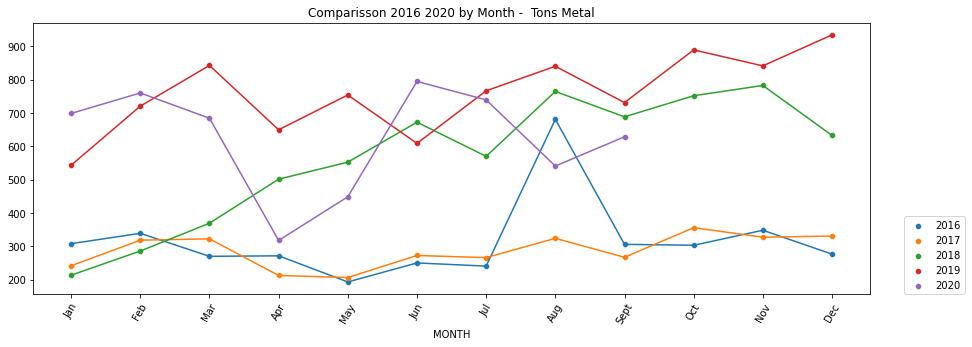

In [ ]:
t = dfSalesF.groupby(['YEAR', 'MONTH']).sum()['Total_Metal']
plt.figure(figsize=(15,5))
for year in range(2016, 2021):
    group = t[year]
    fig = sns.lineplot(x=group.index, y=group.values)
    sns.scatterplot(x=group.index, y=group.values, label=year)
    
plt.xticks(ticks=range(1,13), labels=months, rotation=60)
plt.legend(loc=(1.04,0))
plt.title('Comparisson 2016 2020 by Month -  Tons Metal');

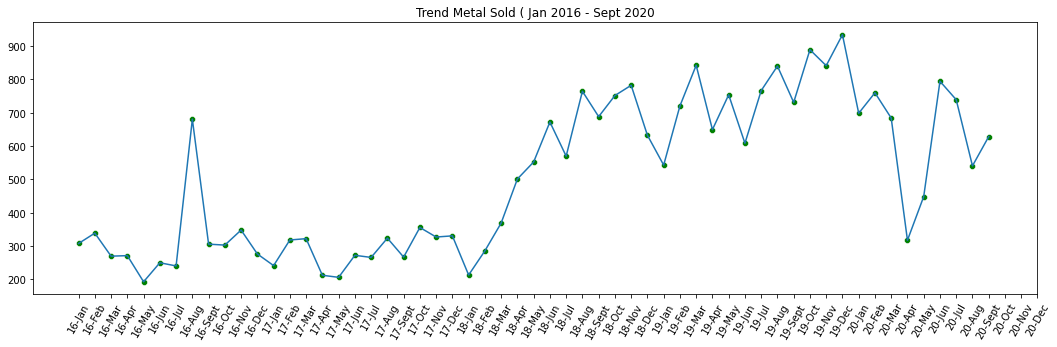

In [ ]:
new_months = []
for y in range(16,21):
    for m in months:
        new_months.append(str(y)+'-'+m)

tend_line_data = t.droplevel(0)
tend_line_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x=tend_line_data.index, y=tend_line_data.values)
sns.scatterplot(x=tend_line_data.index, y=tend_line_data.values, color='green')
plt.xticks(ticks=range(0,60), labels=new_months, rotation=60)
plt.title('Trend Metal Sold ( Jan 2016 - Sept 2020');

### ***Analysis Kg of Copper Sold 2016 -Sept 2020***

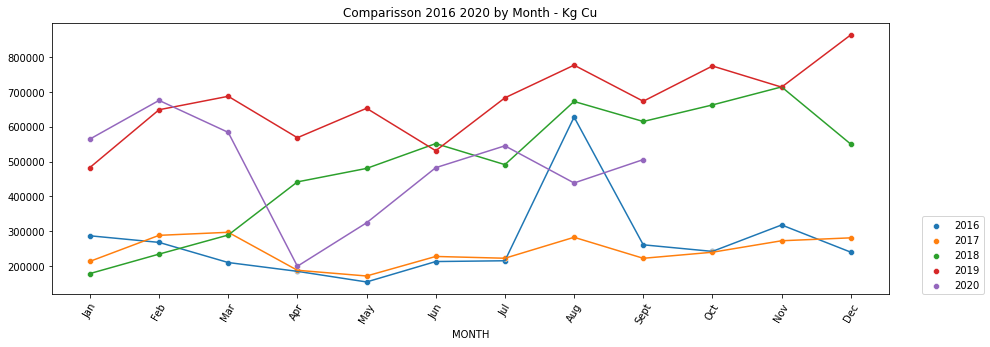

In [ ]:
d = dfSalesF.groupby(['YEAR', 'MONTH']).sum()['MC_Cu_Kg']
plt.figure(figsize=(15,5))
for year in range(2016, 2021):
    group = d[year]
    fig = sns.lineplot(x=group.index, y=group.values)
    sns.scatterplot(x=group.index, y=group.values, label=year)
    
plt.xticks(ticks=range(1,13), labels=months, rotation=60)
plt.legend(loc=(1.04,0))
plt.title('Comparisson 2016 2020 by Month - Kg Cu');

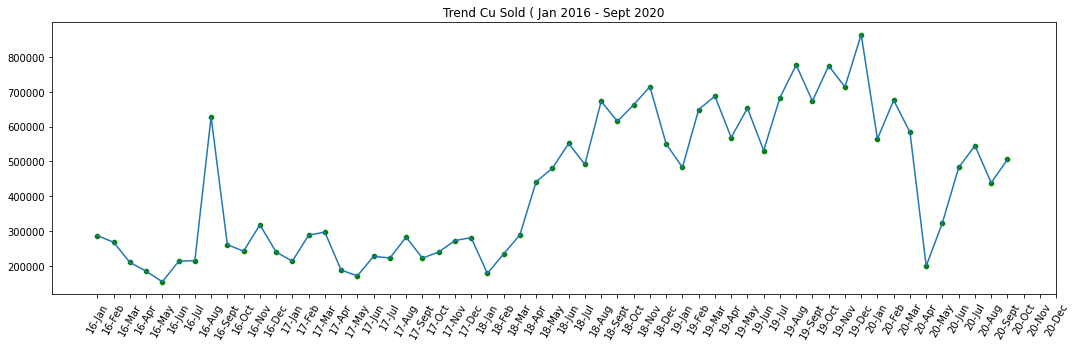

In [ ]:
new_months = []
for y in range(16,21):
    for m in months:
        new_months.append(str(y)+'-'+m)

tend_line_data = d.droplevel(0)
tend_line_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x=tend_line_data.index, y=tend_line_data.values)
sns.scatterplot(x=tend_line_data.index, y=tend_line_data.values, color='green')
plt.xticks(ticks=range(0,60), labels=new_months, rotation=60)
plt.title('Trend Cu Sold ( Jan 2016 - Sept 2020');

### ***Analysis Kg of Aluminum Sold 2016 -Sept 2020***

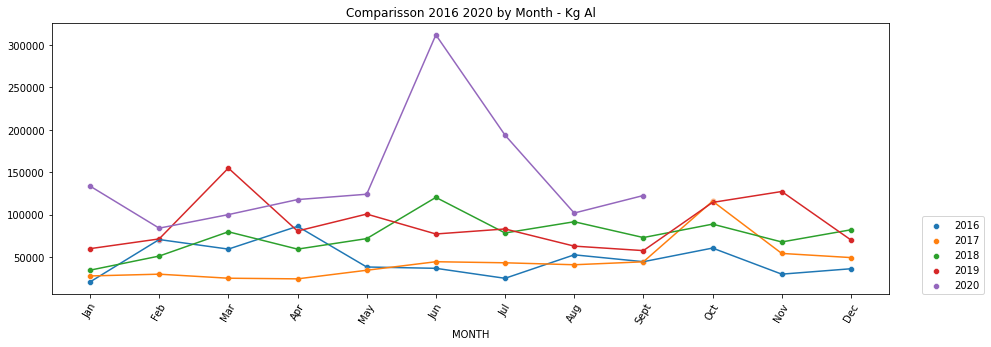

In [ ]:
a = dfSalesF.groupby(['YEAR', 'MONTH']).sum()['MC_Al_Kg']
plt.figure(figsize=(15,5))
for year in range(2016, 2021):
    group = a[year]
    fig = sns.lineplot(x=group.index, y=group.values)
    sns.scatterplot(x=group.index, y=group.values, label=year)
    
plt.xticks(ticks=range(1,13), labels=months, rotation=60)
plt.legend(loc=(1.04,0))
plt.title('Comparisson 2016 2020 by Month - Kg Al');


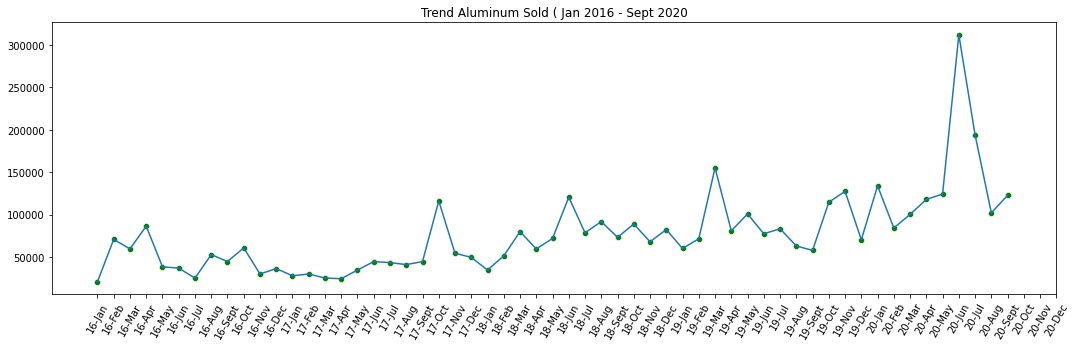

In [ ]:
new_months = []
for y in range(16,21):
    for m in months:
        new_months.append(str(y)+'-'+m)

tend_line_data = a.droplevel(0)
tend_line_data.reset_index(drop=True, inplace=True)
plt.figure(figsize=(18,5))
sns.lineplot(x=tend_line_data.index, y=tend_line_data.values)
sns.scatterplot(x=tend_line_data.index, y=tend_line_data.values, color='green')
plt.xticks(ticks=range(0,60), labels=new_months, rotation=60)
plt.title('Trend Aluminum Sold ( Jan 2016 - Sept 2020');

### Top 10 - Families of references  ( Cu and Al)

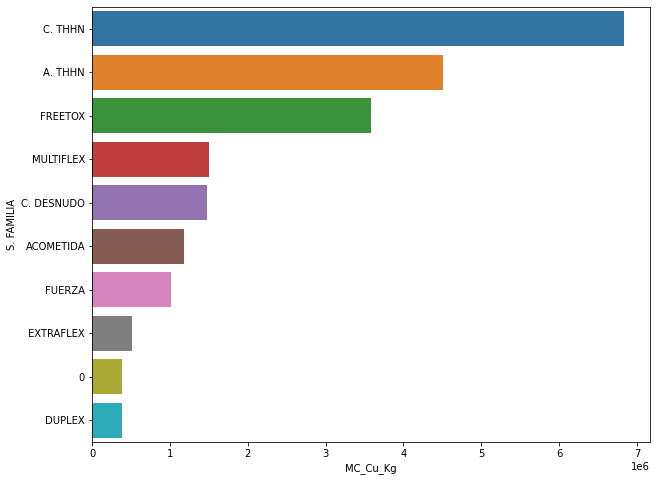

In [ ]:
Top_famCu = dfSalesF.groupby(["S. FAMILIA"])['MC_Cu_Kg'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y='S. FAMILIA', x='MC_Cu_Kg', data=Top_famCu.head(10), orient='h');

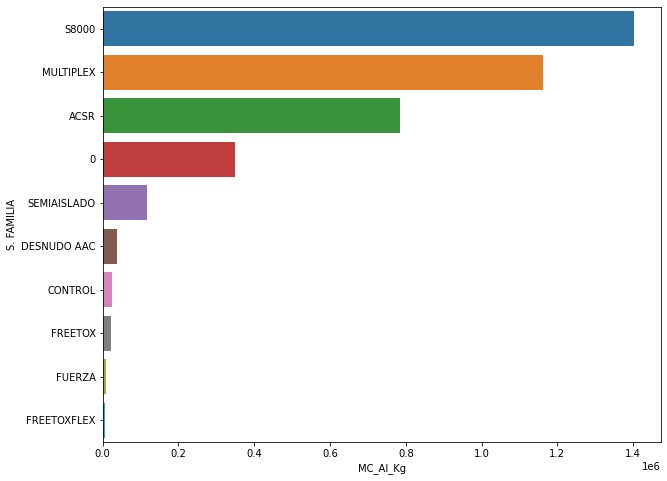

In [ ]:
Top_famAl = dfSalesF.groupby(["S. FAMILIA"])['MC_Al_Kg'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,8))
sns.barplot(y='S. FAMILIA', x='MC_Al_Kg', data=Top_famAl.head(10), orient='h');

# Comparisson Cu vs Al 
**The average sale of aluminum is less than the sale of copper, but aluminum presents atypical values ​​(outliers). The sale of copper shows a more stable behavior**

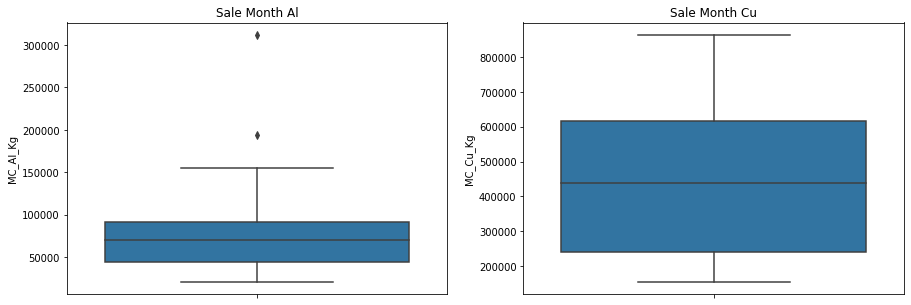

In [ ]:
box = dfSalesF.groupby(['YEAR', 'MONTH']).sum()[['MC_Al_Kg','MC_Cu_Kg']]
box=box.droplevel(0)
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot( y=box.MC_Al_Kg, ax=axes[0])
sns.boxplot( y=box.MC_Cu_Kg, ax=axes[1])
axes[0].set_title('Sale Month Al') 
axes[1].set_title('Sale Month Cu') ;

###Comparison of market segments

**The increase in Aluminum sales is justified in the Utilities segment, which has presented greater demand in the last 3 years, due to the supply of energy projects for companies such as Enel, Celsia and EPM. The D&I segment in the case of copper is the most relevant and clients such as Cable Colombia and Sodimac stand out**




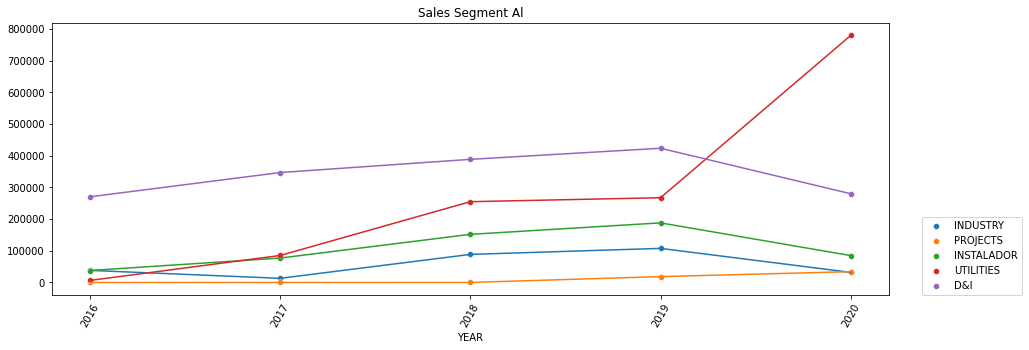

In [ ]:
TxSegAl = dfSalesF.groupby(['SEGMENT' ,'YEAR']).sum()['MC_Al_Kg']
plt.figure(figsize=(15,5))
for segm in set(TxSegAl.index.get_level_values(0)):
    group = TxSegAl[segm]
    fig = sns.lineplot(x=group.index, y=group.values)
    sns.scatterplot(x=group.index, y=group.values, label=segm)
    
plt.xticks(ticks=range(2016,2021), labels=range(2016,2021), rotation=60)
plt.legend(loc=(1.04,0))
plt.title('Sales Segment Al');

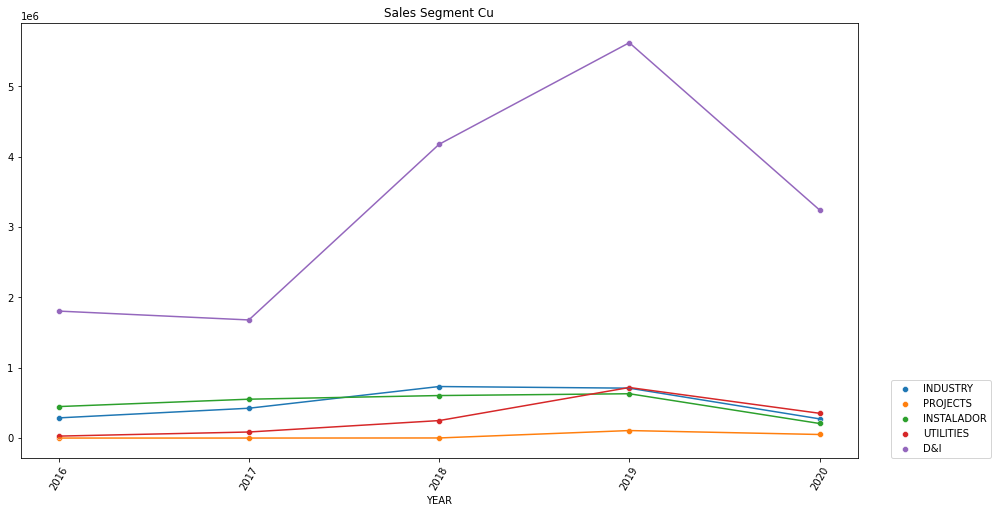

In [ ]:
TxSegCu = dfSalesF.groupby(['SEGMENT' ,'YEAR']).sum()['MC_Cu_Kg']
plt.figure(figsize=(15,8))
for segm in set(TxSegCu.index.get_level_values(0)):
    group = TxSegCu[segm]
    fig = sns.lineplot(x=group.index, y=group.values)
    sns.scatterplot(x=group.index, y=group.values, label=segm)
    
plt.xticks(ticks=range(2016,2021), labels=range(2016,2021), rotation=60)
plt.legend(loc=(1.04,0))
plt.title('Sales Segment Cu');


In [ ]:
dfSalesF.to_csv('/content/drive/My Drive/DS4A/DS4A_Nexans_Colombia_Final Project_2020_2/[W7] In-depth EDA/Nexan_Pre/MergeNexans.csv',index=False)

## External Stocks of Interest



Hereafter, the information of interest from the Colombian market indicators will be imported, both in the economic sector and in the raw material for the manufacture of electrical conductor cable.

#### Limpieza EXTRA

In [ ]:
drop_idx = dfSalesF[(dfSalesF['S. FAMILIA'] == 'FOTOVOLTAICO') & (dfSalesF['MONTH'] == 5) & (dfSalesF['YEAR'] == 2018)].index
dfSalesF.drop(drop_idx, inplace=True)

In [ ]:
dfSalesF['S. FAMILIA'].unique()

array(['MULTIFLEX', 'C. THHN', 'DUPLEX', 'FREETOX', 'ACSR', 'C. TRIPLEX',
       'SOLDADOR', 'S8000', 'C. DESNUDO', 'ACOMETIDA', 'ACOM. PLANA', nan,
       'SEMIAISLADO', 'MULTIPLEX', 'FUERZA', 'CONTROL', 'A. DESNUDO',
       'FREETOXFLEX', 'BATERIA', 'TREBOL', 'EASYFIL', 'EXTRAFLEX',
       'INSTRUMENTACION', 'FLEX. THHN', 0, 'MTW - GPT', 'A. THHN',
       'R. FUEGO', 'VFD', 'PLANO NMC', 'CATODICO', 'FOTOVOLTAICO',
       'DESNUDO AAC'], dtype=object)

In [ ]:
percentile = dfSalesF[(dfSalesF['YEAR'] == 2018) & (dfSalesF['MONTH'] == 3) & (dfSalesF['S. FAMILIA'] == 'FREETOXFLEX')]['Tons_Metal'].quantile(0.3)
drop_idx = dfSalesF[(dfSalesF['YEAR'] == 2018) & (dfSalesF['MONTH'] == 3) & (dfSalesF['S. FAMILIA'] == 'FREETOXFLEX') & (dfSalesF['Tons_Metal'] > percentile)].index
dfSalesF.drop(drop_idx, inplace=True)

In [ ]:
percentile = dfSalesF[(dfSalesF['YEAR'] == 2019) & (dfSalesF['MONTH'] == 3) & (dfSalesF['S. FAMILIA'] == 'FREETOXFLEX')]['Tons_Metal'].quantile(0.8)
drop_idx = dfSalesF[(dfSalesF['YEAR'] == 2019) & (dfSalesF['MONTH'] == 3) & (dfSalesF['S. FAMILIA'] == 'FREETOXFLEX') & (dfSalesF['Tons_Metal'] > percentile)].index
dfSalesF.drop(drop_idx, inplace=True)

In [ ]:
drop_idx = dfSalesF[(dfSalesF['YEAR'] == 2018) & (dfSalesF['MONTH'] == 1) & (dfSalesF['S. FAMILIA'] == 'FLEX. THHN')].index
dfSalesF.drop(drop_idx, inplace=True)

In [ ]:
# Familes 
families_drop = ["BATERIA", "CATODICO", "EASYFIL", "INSTRUMENTACION", "MTW - GPT", "R. FUEGO", "SOLDADOR", "VFD"]
dfSalesF = dfSalesF[~dfSalesF['S. FAMILIA'].isin(families_drop)]

In [ ]:
columns_drop = ["Entrega", "Doc_Ventas", "Factura", "Fecha_Reparto", "Factura.1", "Fecha_de_Pedido", "Fecha_Entrega",
                "Stock_Pedidos", "Financial Score", "G.Material2", "G.Material3", "UNIDAD DE EMPAQUE", "R/C", "kg/km Al",
                "kg/km Cu", "kg/km Neto", "Lead Time (dias)", "S. EMPAQUE", 'MERCADO']
dfSalesF.drop(columns_drop, axis=1, inplace=True)

#### Stock Data

In [ ]:
df_pib = pd.read_csv('drive/My Drive/DS4A/data/External DS/PIB COLOMBIA YEAR.csv', delimiter=',')
df_pib_cost = pd.read_csv('drive/My Drive/DS4A/data/External DS/PIB COST COLOMBIA.csv', delimiter=',')
df_Al = pd.read_csv('drive/My Drive/DS4A/data/External DS/2ALUMINIUM PRICES PER MONTH.csv', delimiter=',')
df_Cu = pd.read_csv('drive/My Drive/DS4A/data/External DS/COOPER PRICES PER MONTH.csv', delimiter=',')

In [ ]:
df_Cu[~df_Cu[' value'].isnull()]

,date,value
0,7/2/1959,0.29
1,7/6/1959,0.29
2,7/7/1959,0.28
3,7/8/1959,0.28
4,7/9/1959,0.28
...,...,...
15330,10/5/2020,2.96
15331,10/6/2020,2.96
15332,10/7/2020,3.03
15333,10/8/2020,3.04


#### DATA CLEANING df_pib GDP colombia per year

In [ ]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   YEAR                       48 non-null     int64 
 1   Value(usd)                 48 non-null     object
 2   Value(usd)thousandMillion  48 non-null     int64 
 3   PerVar                     48 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.6+ KB


In [ ]:
df_pib['Value(usd)']=df_pib['Value(usd)'].str.replace('$', '')
df_pib['Value(usd)']=df_pib['Value(usd)'].str.replace(',', '')
df_pib['Value(usd)']=df_pib['Value(usd)'].astype(int)
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   YEAR                       48 non-null     int64 
 1   Value(usd)                 48 non-null     int64 
 2   Value(usd)thousandMillion  48 non-null     int64 
 3   PerVar                     48 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [ ]:
df_pib.head()

,YEAR,Value(usd),Value(usd)thousandMillion,PerVar
0,2019,323803000000,323803,3.30%
1,2018,330974000000,330974,2.50%
2,2017,311796000000,311796,1.40%
3,2016,282720000000,282720,2.10%
4,2015,293493000000,293493,3.00%


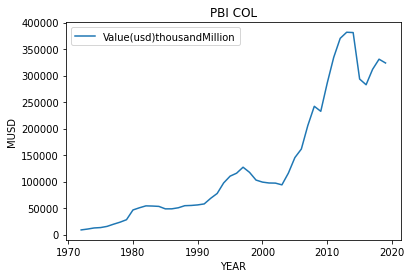

In [ ]:
ax = df_pib.plot(x = 'YEAR', y = 'Value(usd)thousandMillion', kind = 'line')
ax.legend(loc = 'upper left')
ax.set_ylabel('MUSD')
plt.title('PBI COL')
plt.show()

####DATA CLEANING dataframe PIB construction

In [ ]:
df_pib_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   62 non-null     object
 1   Buildings              62 non-null     int64 
 2   CivilConstructions     62 non-null     int64 
 3   EspecializedAct        62 non-null     int64 
 4   Construction           62 non-null     int64 
 5   pib(thousandMillions)  62 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 3.0+ KB


In [ ]:
df_pib_cost.head()

,Date,Buildings,CivilConstructions,EspecializedAct,Construction,pib(thousandMillions)
0,1/3/2005,4985,881,1910,7192,119444
1,1/6/2005,3930,877,1424,5858,125192
2,1/9/2005,4186,1409,1451,6858,128386
3,1/12/2005,4471,3144,1905,9900,141831
4,1/3/2006,5286,907,2020,7582,127214


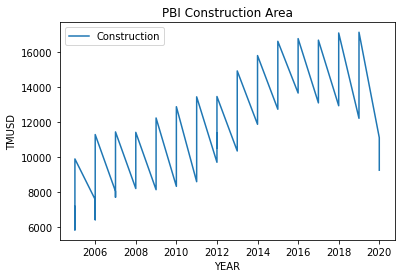

In [ ]:
df_pib_cost.insert(0, 'YEAR', pd.DatetimeIndex(df_pib_cost['Date']).year)
ax = df_pib_cost.plot(x = 'YEAR', y = 'Construction', kind = 'line')
ax.legend(loc = 'upper left')
ax.set_ylabel('TMUSD')
plt.title('PBI Construction Area')
plt.show()

#### DATA CLEANING ALUMINIUM PRICES PER MONTH

In [ ]:
df_Al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        50 non-null     object 
 1   Value(USD)  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
#turn data to time 
df_Al['Date']=pd.to_datetime(df_Al['Date'])
df_Al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        50 non-null     datetime64[ns]
 1   Value(USD)  50 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 928.0 bytes


In [ ]:
df_Al.head(5)

,Date,Value(USD)
0,2020-09-15,1743.77
1,2020-08-15,1737.26
2,2020-07-15,1643.81
3,2020-06-15,1568.57
4,2020-05-15,1466.37


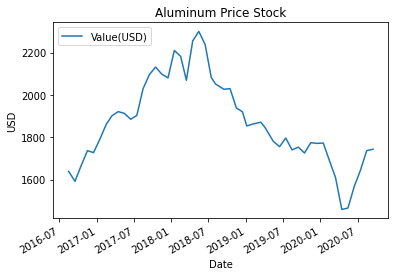

In [ ]:
ax = df_Al.plot(x = 'Date', y = 'Value(USD)', kind = 'line')
ax.legend(loc = 'upper left')
ax.set_ylabel('USD')
plt.title('Aluminum Price Stock')
plt.show()

#### DATA CLEANING COOPER PRICES PER MONTH

In [ ]:
df_Cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15356 entries, 0 to 15355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    15335 non-null  object 
 1    value  15335 non-null  float64
dtypes: float64(1), object(1)
memory usage: 240.1+ KB


In [ ]:
#turn data to time 
df_Cu['date']=pd.to_datetime(df_Cu['date'])
df_Cu.rename(columns={' value': 'Value(USD)'})
df_Cu.dropna(inplace=True)
df_Cu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15335 entries, 0 to 15334
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    15335 non-null  datetime64[ns]
 1    value  15335 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 359.4 KB


In [ ]:
df_Cu.head()

,date,value
0,1959-07-02,0.29
1,1959-07-06,0.29
2,1959-07-07,0.28
3,1959-07-08,0.28
4,1959-07-09,0.28


In [ ]:
ax = df_Cu[df_Cu['YEAR'] > 2015].plot(x = 'date', y = ' value', kind = 'line')
ax.legend(loc = 'upper left')
ax.set_ylabel('USD')
plt.title('Copper Price Stock')
plt.show()

KeyError: ignored

## ---------- 
#Analisis Adicional 

In [ ]:
dfSalesMonth=dfSalesF.copy()
Sales_Month = dfSalesMonth.resample('M', on='Fecha_factura').sum()


In [ ]:
Sales_Month.columns

Index(['YEAR', 'MONTH', 'DAY', 'WEEK', 'Entrega', 'Doc_Ventas', 'NIT',
       'Factura.1', 'Material', 'MC_Al_Kg', 'MC_Cu_Kg', 'Precio_Cliente',
       'Precio_Neto', 'Valor_Moneda_Local', 'G.Material2', 'G.Material3',
       'kg/km Al', 'kg/km Cu', 'kg/km Neto', 'Lead Time (dias)',
       'Total_Metal'],
      dtype='object')

***Decomposing Time Series ( Trend , Seasonality , Noise)***

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
result = seasonal_decompose(Sales_Month['MC_Cu_Kg'], model='additive')

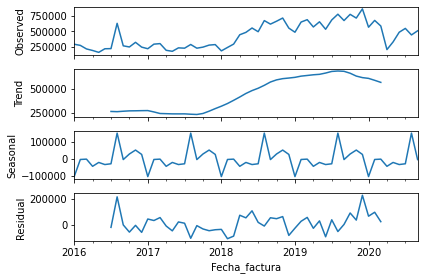

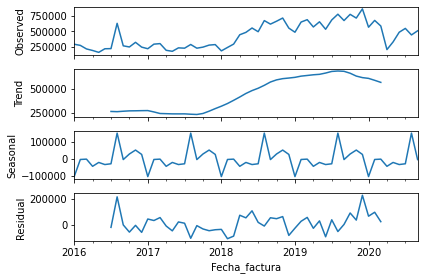

In [ ]:
result.plot()

In [ ]:
result2 = seasonal_decompose(Sales_Month['MC_Cu_Kg'], model='multiplicative')

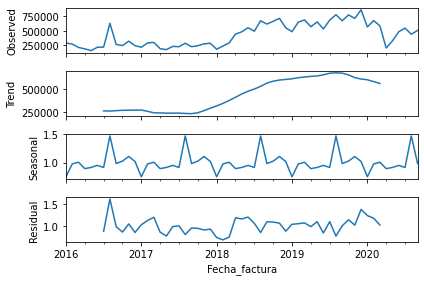

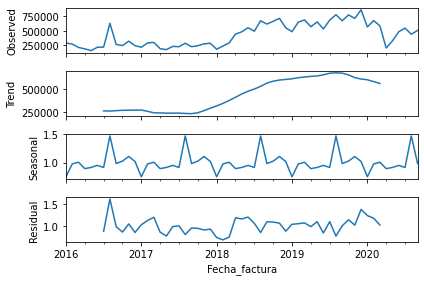

In [ ]:
result2.plot()

***Differencing Series***

Remove Trend

In [ ]:
Sales_Month['Lag1']=Sales_Month['MC_Cu_Kg'].shift(1)
Sales_Month['KgCu_dif1']=Sales_Month['MC_Cu_Kg'].diff(periods=1)


In [ ]:
Sales_Month.columns

Index(['YEAR', 'MONTH', 'DAY', 'WEEK', 'Entrega', 'Doc_Ventas', 'NIT',
       'Factura.1', 'Material', 'MC_Al_Kg', 'MC_Cu_Kg', 'Precio_Cliente',
       'Precio_Neto', 'Valor_Moneda_Local', 'G.Material2', 'G.Material3',
       'kg/km Al', 'kg/km Cu', 'kg/km Neto', 'Lead Time (dias)', 'Total_Metal',
       'Lag1', 'KgCu_dif1'],
      dtype='object')

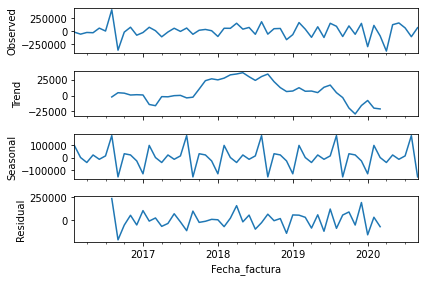

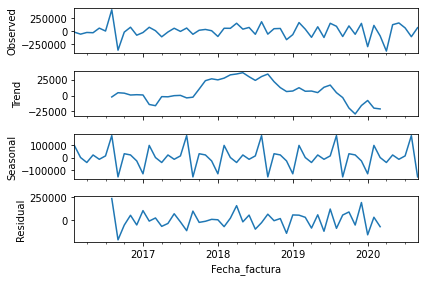

In [ ]:
result_trend = seasonal_decompose(Sales_Month.iloc[1:,22], model='additive')
result_trend.plot()

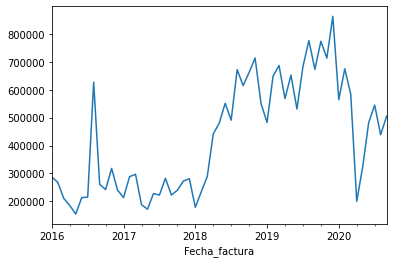

In [ ]:
Sales_Month['MC_Cu_Kg'].plot()

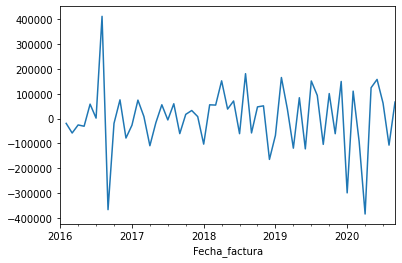

In [ ]:
Sales_Month['KgCu_dif1'].plot()

Remove Seasonality

In [ ]:
#Sales_Month['Lag1']=Sales_Month['MC_Cu_Kg'].shift(12)
Sales_Month['KgCu_dif12']=Sales_Month['KgCu_dif1'].diff(periods=12)

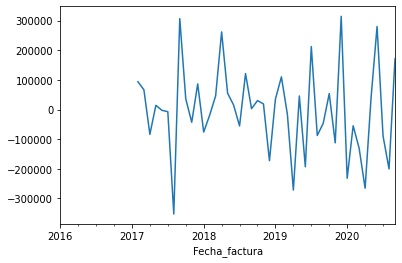

In [ ]:
Sales_Month['KgCu_dif12'].plot()

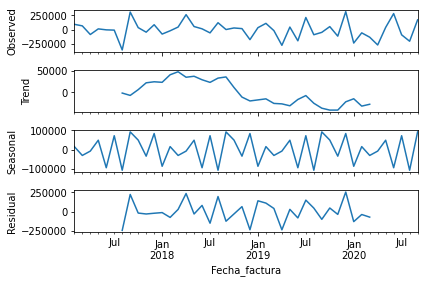

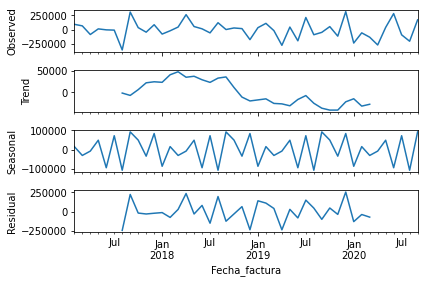

In [ ]:
result_season = seasonal_decompose(Sales_Month.iloc[13:,23], model='additive')
result_season.plot()

***Test-Train Split***

In [ ]:
Sales_Month.shape[0]

57

In [ ]:
train_size = int(Sales_Month.shape[0]*0.8)
train_size

45

In [ ]:
train =  Sales_Month[0:train_size]

In [ ]:
test =  Sales_Month[train_size:]

In [ ]:
train.shape

(45, 24)

In [ ]:
test.shape

(12, 24)

##Persistence Model


In [ ]:
Sales_Month['Cu_kg']=Sales_Month['MC_Cu_Kg'].shift(1)

In [ ]:
train2, test2 = Sales_Month[1:Sales_Month.shape[0]-9], Sales_Month[Sales_Month.shape[0]-9:]

In [ ]:
train2.tail()

,YEAR,MONTH,DAY,WEEK,Entrega,Doc_Ventas,NIT,Factura.1,Material,MC_Al_Kg,MC_Cu_Kg,Precio_Cliente,Precio_Neto,Valor_Moneda_Local,G.Material2,G.Material3,kg/km Al,kg/km Cu,kg/km Neto,Lead Time (dias),Total_Metal,Lag1,KgCu_dif1,KgCu_dif12,Cu_kg
Fecha_factura,,,,,,,,,,,,,,,,,,,,,,,,,
2019-08-31,12560199,49768,125557,17242,505120615173,2.975584e+09,4672113194788,5.652203e+11,69439056325,63051.75,776839.31,2.773209e+09,277470.24,21576327379,2555259.0,734207.0,75467.8,656813.9,938869.1,91867.0,839.89106,683093.50,93745.81,-87590.49,683093.50
2019-09-30,11805093,52623,107481,13292,474789089006,2.809547e+09,4407858058198,5.312651e+11,61458657684,57763.77,673264.19,4.670917e+08,219165.74,19435910874,2428449.0,707271.0,58689.2,632161.1,918194.4,88063.0,731.02796,776839.31,-103575.12,-46086.43,776839.31
2019-10-31,14964828,74120,142104,17567,601923765858,3.578765e+09,5700455436725,6.734970e+11,77243189073,114536.50,774429.18,6.166400e+09,315980.37,22793137817,3080096.0,892113.0,111067.3,949634.2,1386697.4,117857.0,888.96568,673264.19,101164.99,53674.25,673264.19
2019-11-30,11978727,65263,111120,17514,481855205621,2.879131e+09,4450654350805,5.391339e+11,62320346033,127377.95,713764.39,1.212245e+09,213974.97,22108704037,2466209.0,721270.0,99041.3,610154.1,938225.8,92291.0,841.14234,774429.18,-60664.79,-112381.13,774429.18
2019-12-31,12297729,73092,99094,16030,494727511522,2.967915e+09,4662748352208,5.535198e+11,76324486075,70323.00,863746.44,1.512072e+10,352537.43,26821736922,2457613.0,726081.0,82156.4,596907.7,916011.2,87249.0,934.06944,713764.39,149982.05,314153.06,713764.39


In [ ]:
test2.head()

,YEAR,MONTH,DAY,WEEK,Entrega,Doc_Ventas,NIT,Factura.1,Material,MC_Al_Kg,MC_Cu_Kg,Precio_Cliente,Precio_Neto,Valor_Moneda_Local,G.Material2,G.Material3,kg/km Al,kg/km Cu,kg/km Neto,Lead Time (dias),Total_Metal,Lag1,KgCu_dif1,KgCu_dif12,Cu_kg
Fecha_factura,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-31,8593080,4254,89078,11936,345555863006,2.088940e+09,3138964573394,3.866012e+11,44999881214,133798.17,564681.07,8.766700e+08,178239.85,17735537919,1769426.0,515859.0,114899.3,483668.2,788335.2,69215.0,698.47924,863746.44,-299065.37,-231842.65,863746.44
2020-02-29,12087680,11968,115117,16651,486127661169,2.950472e+09,4563449393180,5.438484e+11,61866561209,84214.89,675677.84,3.322429e+09,254478.14,20157783257,2479812.0,715223.0,89713.7,739760.6,1071800.1,92840.0,759.89273,564681.07,110996.77,-54880.09,564681.07
2020-03-31,9615200,14280,70073,11301,386722784794,2.357215e+09,3743042200443,4.326230e+11,48947076663,100162.44,583935.68,1.804139e+09,172521.40,17272797243,1982035.0,580469.0,112651.5,489879.9,806671.5,75739.0,684.09812,675677.84,-91742.16,-130355.81,675677.84
2020-04-30,4538940,8988,55090,4550,182563138551,1.112307e+09,1963232296229,2.042273e+11,22730447328,117863.53,199701.34,1.126079e+10,121731.35,7634940576,935761.0,268232.0,142888.6,316063.3,631385.6,31552.0,317.56487,583935.68,-384234.34,-265371.28,583935.68
2020-05-31,6100400,15100,54582,8076,245373416357,1.499609e+09,2388023019604,2.744875e+11,31245349678,124179.63,324363.40,2.571754e+09,142284.53,10686644203,1266106.0,385438.0,154679.1,248157.9,536029.0,39454.0,448.54303,199701.34,124662.06,40246.94,199701.34


In [ ]:
test2.tail()

,YEAR,MONTH,DAY,WEEK,Entrega,Doc_Ventas,NIT,Factura.1,Material,MC_Al_Kg,MC_Cu_Kg,Precio_Cliente,Precio_Neto,Valor_Moneda_Local,G.Material2,G.Material3,kg/km Al,kg/km Cu,kg/km Neto,Lead Time (dias),Total_Metal,Lag1,KgCu_dif1,KgCu_dif12,Cu_kg
Fecha_factura,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-31,6100400,15100,54582,8076,245373416357,1.499609e+09,2388023019604,2.744875e+11,31245349678,124179.63,324363.40,2.571754e+09,142284.53,10686644203,1266106.0,385438.0,154679.1,248157.9,536029.0,39454.0,448.54303,199701.34,124662.06,40246.94,199701.34
2020-06-30,10570660,31398,85687,14647,425195496868,2.603570e+09,3907810259584,4.756375e+11,53884978461,311857.78,482593.68,2.951405e+09,513300.16,19001486220,2184560.0,652179.0,363669.8,454933.5,1103375.1,72110.0,794.45146,324363.40,158230.28,279986.30,324363.40
2020-07-31,10275740,35609,88687,13141,413360389561,2.537097e+09,3711323391017,4.623824e+11,58598504581,193750.13,545308.42,3.946959e+09,318958.87,19033533048,2082680.0,614753.0,277080.8,366086.2,840714.2,62157.0,739.05855,482593.68,62714.74,-89137.51,482593.68
2020-08-31,7154840,28336,63681,8444,287838981602,1.772265e+09,2574549167452,3.219619e+11,36138061954,102009.24,438675.16,9.666627e+08,135116.70,14831552955,1474233.0,434373.0,82435.3,349367.2,576920.0,52477.0,540.68440,545308.42,-106633.26,-200379.07,545308.42
2020-09-30,9835380,43821,88889,12918,395709169493,2.443644e+09,3566540372921,4.426008e+11,49555330241,122662.65,505789.05,1.840165e+09,197105.04,18634213030,2033958.0,611071.0,228599.5,476032.3,810980.7,70054.0,628.45170,438675.16,67113.89,170689.01,438675.16


In [ ]:
train_X, train_y = train2['Cu_kg'], train2['MC_Cu_Kg']
test_X, test_y = test2['Cu_kg'], test2['MC_Cu_Kg']

##### walk-forward validation

In [ ]:
predictions = test_X.copy()

In [ ]:
print(predictions)
print(test_y)

Fecha_factura
2020-01-31    863746.44
2020-02-29    564681.07
2020-03-31    675677.84
2020-04-30    583935.68
2020-05-31    199701.34
2020-06-30    324363.40
2020-07-31    482593.68
2020-08-31    545308.42
2020-09-30    438675.16
Freq: M, Name: Cu_kg, dtype: float64
Fecha_factura
2020-01-31    564681.07
2020-02-29    675677.84
2020-03-31    583935.68
2020-04-30    199701.34
2020-05-31    324363.40
2020-06-30    482593.68
2020-07-31    545308.42
2020-08-31    438675.16
2020-09-30    505789.05
Freq: M, Name: MC_Cu_Kg, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

35355394015.0131

In [ ]:
from matplotlib import pyplot

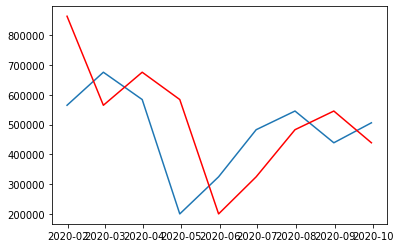

In [ ]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

##Autoregression Model 

In [ ]:
traindef=train2['MC_Cu_Kg']
testdef=test2['MC_Cu_Kg']
traindef

Fecha_factura
2016-02-29    268158.92
2016-03-31    210354.72
2016-04-30    185078.11
2016-05-31    154592.04
2016-06-30    213186.61
2016-07-31    215439.74
2016-08-31    627869.30
2016-09-30    261199.01
2016-10-31    242311.52
2016-11-30    318155.95
2016-12-31    240102.09
2017-01-31    213637.62
2017-02-28    288391.51
2017-03-31    297130.94
2017-04-30    188100.48
2017-05-31    171732.62
2017-06-30    227793.92
2017-07-31    222673.33
2017-08-31    282802.18
2017-09-30    222520.87
2017-10-31    239900.62
2017-11-30    272836.50
2017-12-31    281203.53
2018-01-31    178658.16
2018-02-28    234527.45
2018-03-31    289270.75
2018-04-30    441793.50
2018-05-31    480479.41
2018-06-30    551748.69
2018-07-31    491293.74
2018-08-31    672630.04
2018-09-30    615141.35
2018-10-31    662632.09
2018-11-30    714348.43
2018-12-31    550177.42
2019-01-31    482954.70
2019-02-28    648831.56
2019-03-31    687445.21
2019-04-30    568582.15
2019-05-31    652997.27
2019-06-30    531241.25
20

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
model = AR(traindef)
model_fit = model.fit()

**No. of lag VAriables**

In [ ]:
model_fit.k_ar

10

In [ ]:
model_fit.params

const           15586.570213
L1.MC_Cu_Kg         0.598702
L2.MC_Cu_Kg         0.245088
L3.MC_Cu_Kg         0.208680
L4.MC_Cu_Kg        -0.043870
L5.MC_Cu_Kg         0.033443
L6.MC_Cu_Kg         0.016970
L7.MC_Cu_Kg        -0.105743
L8.MC_Cu_Kg        -0.131454
L9.MC_Cu_Kg         0.107632
L10.MC_Cu_Kg        0.094218
dtype: float64

In [ ]:
predictions2 = model_fit.predict(start=len(traindef), end=len(traindef)+len(testdef)-1)

In [ ]:
predictions2

2020-01-31    861245.287469
2020-02-29    875370.622120
2020-03-31    883773.929505
2020-04-30    888354.797369
2020-05-31    927515.865904
2020-06-30    946480.693207
2020-07-31    961695.178164
2020-08-31    967494.935556
2020-09-30    986493.805219
Freq: M, dtype: float64

In [ ]:
predictions2.iloc[0]

861245.2874688813

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions2)
mse

217229278861.9444

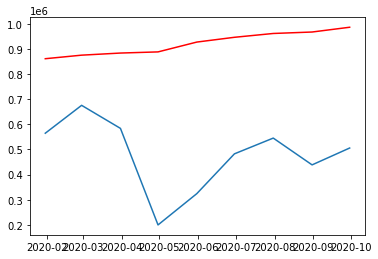

In [ ]:
pyplot.plot(test_y)
pyplot.plot(predictions2, color='red')

### Walk Forward

In [ ]:
data = traindef
predict2 =[]
for t in testdef:
    model = AR(data)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(traindef)+len(testdef)-1)
    #print(y.values[0])
    predict2.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

In [ ]:
predict2

[861245.2874688813,
 737220.783491999,
 629021.1009393805,
 606123.2470832721,
 369053.1856822059,
 206090.7684791048,
 319792.8149358284,
 506276.63270165527,
 580404.5369772465]

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(testdef.values, predict2)
mse

44266120652.7409

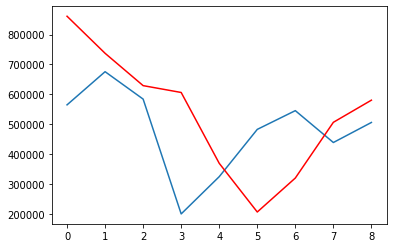

In [ ]:
pyplot.plot(testdef.values)
pyplot.plot(predict2, color='red')

### Moving Average Model

In [ ]:
Sales_Month['Resid'] = Sales_Month['MC_Cu_Kg'] -Sales_Month['Cu_kg']
#Sales_Month['Cu_kg']=Sales_Month['MC_Cu_Kg'].shift(1)
train3, test3 = Sales_Month.Resid[1:Sales_Month.shape[0]-9], Sales_Month[Sales_Month.shape[0]-9:]

In [ ]:
train3.head(2)

Fecha_factura
2016-02-29   -18957.51
2016-03-31   -57804.20
Freq: M, Name: Resid, dtype: float64

In [ ]:
modelMA = AR(train3)
model_fitMA = model.fit()
model_fitMA.k_ar

10

In [ ]:
model_fitMA.params

const    61203.382675
L1.y         0.643073
L2.y         0.124432
L3.y         0.218901
L4.y        -0.077883
L5.y        -0.065520
L6.y        -0.033186
L7.y         0.101047
L8.y        -0.274636
L9.y         0.170010
L10.y        0.085874
dtype: float64

In [ ]:

#predictions2 = model_fit.predict(start=len(traindef), end=len(traindef)+len(testdef)-1)

pred_resid = model_fitMA.predict(start=len(train3), end=len(train3)+len(test3)-1)
pred_resid

47    779031.286276
48    640816.608852
49    663665.301602
50    521099.426512
51    370014.745668
52    344788.821567
53    427863.387456
54    474387.320695
55    580404.536977
dtype: float64

In [ ]:
Sales_Month.Cu_kg[Sales_Month.shape[0]-9:]

Fecha_factura
2020-01-31    863746.44
2020-02-29    564681.07
2020-03-31    675677.84
2020-04-30    583935.68
2020-05-31    199701.34
2020-06-30    324363.40
2020-07-31    482593.68
2020-08-31    545308.42
2020-09-30    438675.16
Freq: M, Name: Cu_kg, dtype: float64

In [ ]:
predictionsMA = Sales_Month.Cu_kg[Sales_Month.shape[0]-9:] + pred_resid

In [ ]:
predictionsMA

2020-01-31 00:00:00   NaN
2020-02-29 00:00:00   NaN
2020-03-31 00:00:00   NaN
2020-04-30 00:00:00   NaN
2020-05-31 00:00:00   NaN
2020-06-30 00:00:00   NaN
2020-07-31 00:00:00   NaN
2020-08-31 00:00:00   NaN
2020-09-30 00:00:00   NaN
47                    NaN
48                    NaN
49                    NaN
50                    NaN
51                    NaN
52                    NaN
53                    NaN
54                    NaN
55                    NaN
dtype: float64

#ARIMA

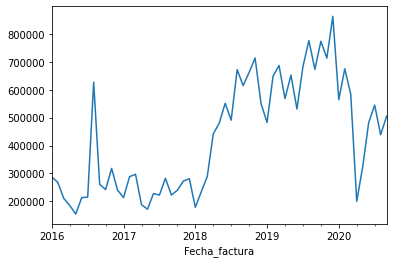

In [ ]:
Sales_Month['MC_Cu_Kg'].plot()

Trend is Polynomial D=2

###Autocorrelation plot

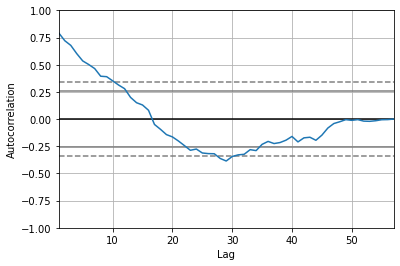

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Sales_Month['MC_Cu_Kg'])

Q = 10

###Partial Autocorrelation Graph

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

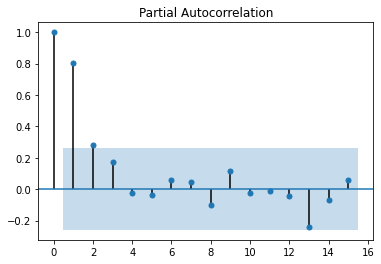

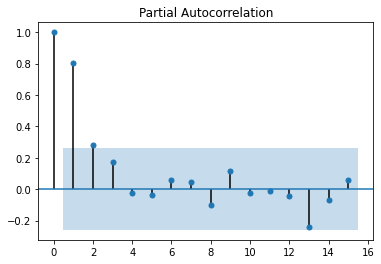

In [ ]:
plot_pacf(Sales_Month['MC_Cu_Kg'], lags=15)

p=2

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
modelARIMA = ARIMA(Sales_Month['MC_Cu_Kg'], order=(2,2,0))

In [ ]:
model_fit = modelARIMA.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D2.MC_Cu_Kg   No. Observations:                   55
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -733.670
Method:                       css-mle   S.D. of innovations         149007.719
Date:                Wed, 21 Oct 2020   AIC                           1475.340
Time:                        02:54:02   BIC                           1483.369
Sample:                    03-31-2016   HQIC                          1478.445
                         - 09-30-2020                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1564.9345   8636.674      0.181      0.857   -1.54e+04    1.85e+04
ar.L1.D2.MC_Cu_Kg    -0.8766      0.116     -7.569      0.000      -1.104      -0.650
ar.L2.D2.MC_Cu_Kg    -0.4846      0.115     -4.229      0.000      -0.709      -0.260
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9044           -1.1160j            1.4365           -0.3584
AR.2           -0.9044           +1.1160j            1.4365            0.3584
-----------------------------------------------------------------------------
"""

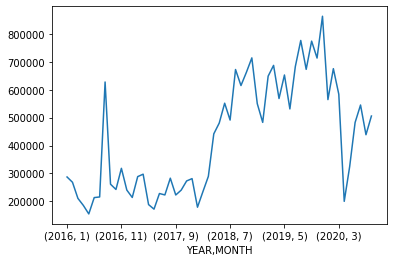

In [ ]:
d = dfSalesF.groupby(['YEAR', 'MONTH']).sum()['MC_Cu_Kg']

d.plot()


In [ ]:
d.describe()

count        57.000000
mean     427945.690877
std      203386.345536
min      154592.040000
25%      239900.620000
50%      438675.160000
75%      615141.350000
max      863746.440000
Name: MC_Cu_Kg, dtype: float64

In [ ]:
dfSeries=pd.DataFrame(d)
dfSeries

MC_Cu_Kg
YEAR MONTH           
2016 1      287116.43
     2      268158.92
     3      210354.72
     4      185078.11
     5      154592.04
     6      213186.61
     7      215439.74
     8      627869.30
     9      261199.01
     10     242311.52
     11     318155.95
     12     240102.09
2017 1      213637.62
     2      288391.51
     3      297130.94
     4      188100.48
     5      171732.62
     6      227793.92
     7      222673.33
     8      282802.18
     9      222520.87
     10     239900.62
     11     272836.50
     12     281203.53
2018 1      178658.16
     2      234527.45
     3      289270.75
     4      441793.50
     5      480479.41
     6      551748.69
     7      491293.74
     8      672630.04
     9      615141.35
     10     662632.09
     11     714348.43
     12     550177.42
2019 1      482954.70
     2      648831.56
     3      687445.21
     4      568582.15
     5      652997.27
     6      531241.25
     7      683093.50
     8      776839.31
     9      673264.19
     10     774429.18
     11     713764.39
     12     863746.44
2020 1      564681.07
     2      675677.84
     3      583935.68
     4      199701.34
     5      324363.40
     6      482593.68
     7      545308.42
     8      438675.16
     9      505789.05

In [ ]:
#sns.regplot(x= dfSeries.index.values, y=dfSeries['MC_Cu_Kg'])
dfSeries
#sns.regplot(x= dfSeries.MONTH, y=dfSeries['MC_Cu_Kg'])

MC_Cu_Kg
YEAR MONTH           
2016 1      287116.43
     2      268158.92
     3      210354.72
     4      185078.11
     5      154592.04
     6      213186.61
     7      215439.74
     8      627869.30
     9      261199.01
     10     242311.52
     11     318155.95
     12     240102.09
2017 1      213637.62
     2      288391.51
     3      297130.94
     4      188100.48
     5      171732.62
     6      227793.92
     7      222673.33
     8      282802.18
     9      222520.87
     10     239900.62
     11     272836.50
     12     281203.53
2018 1      178658.16
     2      234527.45
     3      289270.75
     4      441793.50
     5      480479.41
     6      551748.69
     7      491293.74
     8      672630.04
     9      615141.35
     10     662632.09
     11     714348.43
     12     550177.42
2019 1      482954.70
     2      648831.56
     3      687445.21
     4      568582.15
     5      652997.27
     6      531241.25
     7      683093.50
     8      776839.31
     9      673264.19
     10     774429.18
     11     713764.39
     12     863746.44
2020 1      564681.07
     2      675677.84
     3      583935.68
     4      199701.34
     5      324363.40
     6      482593.68
     7      545308.42
     8      438675.16
     9      505789.05

In [ ]:
dfSeries['lag1'] =  dfSeries['MC_Cu_Kg'].shift(1)


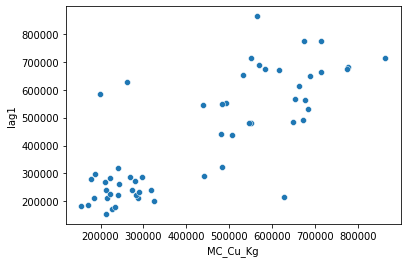

In [ ]:
sns.scatterplot(x="MC_Cu_Kg",y="lag1", data=dfSeries)

In [ ]:
from pandas.plotting import autocorrelation_plot

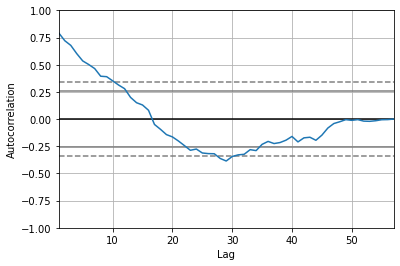

In [ ]:
autocorrelation_plot( dfSeries['MC_Cu_Kg'])